In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset
df = pd.read_csv("ObesityDataSet2.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


# **Exploratory Data Analysis**

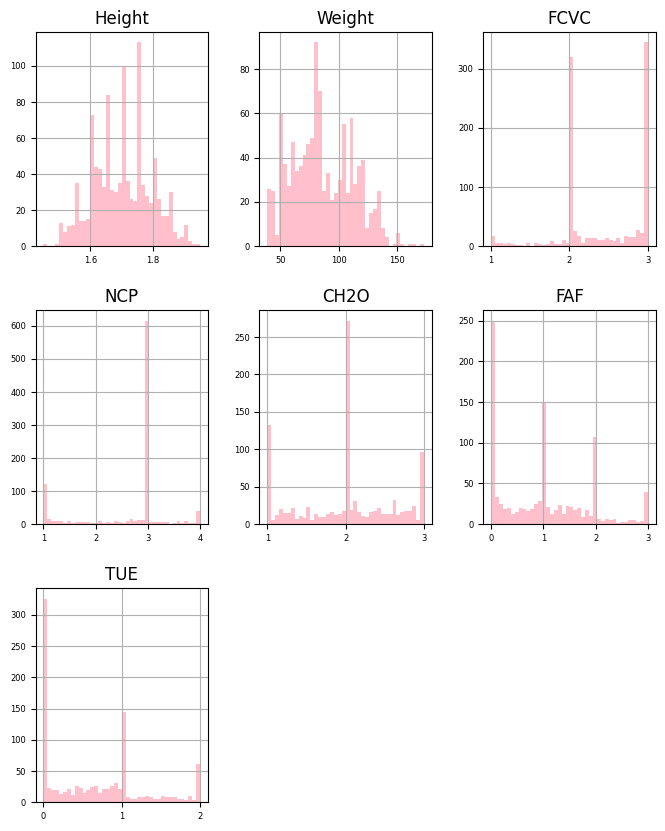

In [7]:
# data distribution before preprocessing
df.hist(figsize=(8, 10), bins=40, xlabelsize=6, ylabelsize=6, color='pink');

This plot shows the distribution of several numerical features in the dataset before preprocessing. Features like `Height` and `Weight` have a more naturally spread distribution, although some outliers are visible, especially for weight. In contrast, variables such as `FCVC`, `NCP`, `CH2O`, `FAF`, and `TUE` show strong peaks at specific values (2 or 3), indicating that many individuals gave the same responses, due to all of them were measures in Likert Sclaes.

## ***Inconsistent/Incorrect Data Types***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

**What to do?**
* Convert `Age` to int
* Binary encoding for `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC`
* Ordinal encoding for `CAEC`, `CALC`, `NObeyesdad`,
* Mapping for ordinal encoding `FCVC`, `NCP`, `CH2O`, `FAF`, `TUE`
* One-hot encoding for `MTRANS`

In [6]:
df.shape # data has 1056 records with 17 columns

(1056, 17)

In [8]:
# before converting age to int we need to do some formating
# because some of them appears to has ' years' appended
df['Age'].value_counts()

,count
Age,
21,128
23,118
18,107
26,102
19,79
22,73
20,69
24,42
17,36


In [9]:
# convert age to int
df['Age'] = df['Age'].str.replace(' years', '').astype(int)
df['Age'] = df['Age'].astype(int)

In [10]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,24.235795,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,6.321129,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,23.000000,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,26.000000,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,55.000000,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


This statistical summary provides insights into the central tendency and spread of the numerical variables before preprocessing.
1. The average `Age` of participants is around 24 years, with most being between 20 and 26.
2. `Heights` range from 1.45 m to 1.95 m, with an average of 1.70 m.
3. The average `Weight` is about 86.5 kg, but with a wide range from 39 kg to 173 kg, indicating possible outliers.
4. `FCVC` (frequency of vegetable consumption) has a mean of 2.42 on a scale from 1 to 3, suggesting that most individuals report a relatively healthy habit.
5. Similarly, `CH2O` (daily water intake) centers around 2, implying moderate hydration levels.
<br>
<br>
The other lifestyle features reveal skewed distributions.
1. `NCP` (number of main meals) ranges from 1 to 4 with a mean of 2.65, but the 25th and 75th percentiles show most values concentrate around 2.5 to 3.
2. `FAF` (physical activity) and `TUE` (technology use) both have low means (around 1 and 0.6, respectively), indicating limited exercise and moderate screen time among participants.
3. Notably, `FAF` includes 0, meaning some individuals do not exercise at all. This summary highlights the need for normalization and possibly outlier treatment before modeling.

## ***Missing Value Imputation***

In [12]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,37
NCP,0
CAEC,0
SMOKE,0


The dataset has very few missing values, with only two features affected:
1. `FCVC` (frequency of vegetable consumption) has 37 missing entries
2. `MTRANS` (mode of transportation) has 26 missing entries.

These missing values represent a small portion of the total 1056 records, so they can be handled efficiently using common imputation techniques. For `FCVC`, since it’s a numeric scale (1 to 3), imputing with the median or mode would preserve the distribution. For `MTRANS`, a categorical variable, filling with the most frequent category (mode) is a reasonable approach unless domain knowledge suggests otherwise.

In [13]:
# CATEGORICAL
# insert missing value using mode
df['MTRANS'].fillna(df['MTRANS'].mode()[0],inplace=True)

/tmp/ipython-input-13-1041560685.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MTRANS'].fillna(df['MTRANS'].mode()[0],inplace=True)


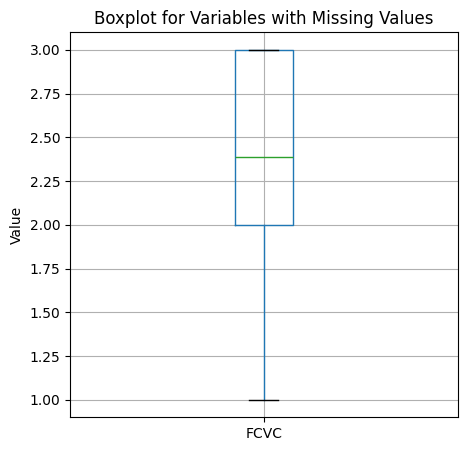

In [14]:
# NUMERICAL
# check whether the variable has outliers
missing = df.boxplot(column=['FCVC'], figsize=(5, 5))
plt.title("Boxplot for Variables with Missing Values")
plt.ylabel("Value")
plt.show()

The boxplot for `FCVC` shows no outliers, which makes sense since it's a Likert scale (1 to 3) with fixed response options. That’s why using the median to fill missing values is preferred. It better represents the center without being affected by skewed data.

In [15]:
# checking for skewed
df['FCVC'].skew()

np.float64(-0.43712825738978545)

In [16]:
# because the data is skewed we need to input using median
df['FCVC'] = df['FCVC'].fillna(df['FCVC'].median())

In [17]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


## ***Check for Duplications***

In [18]:
df.duplicated().sum()

np.int64(11)

In [19]:
# drop 11 rows duplicate
df.drop_duplicates(inplace = True)

In [20]:
df.shape

(1045, 17)

## ***Correlation***

Text(0.5, 1.0, 'Korelasi Antar Kolom Numerik')

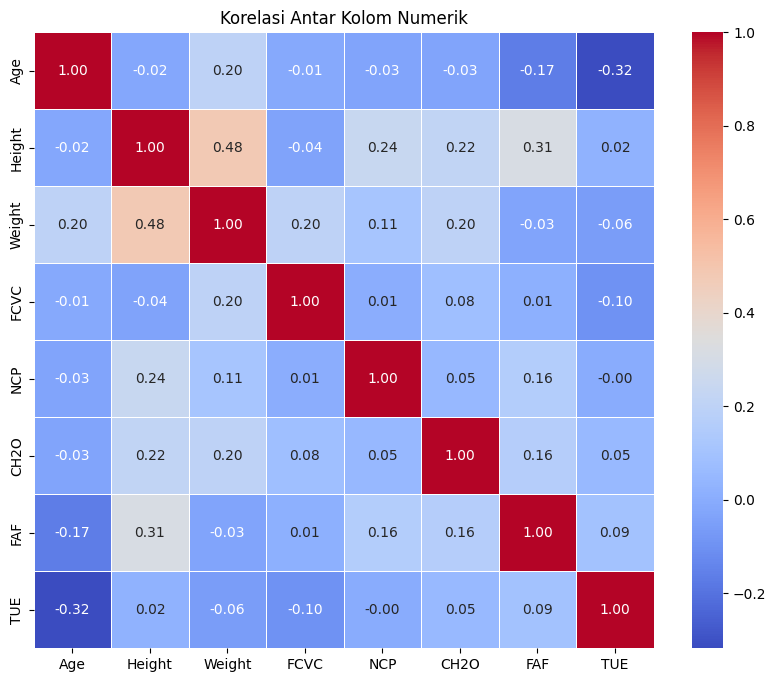

In [21]:
numeric_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numeric_cols.append(col)

numeric_df = df[numeric_cols]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Kolom Numerik')

The heatmap shows the correlation between numerical features in the dataset. Most correlations are weak, suggesting that the variables are fairly independent from each other. The strongest positive correlation is between **Height and Weight (0.48)**, which is expected, taller individuals tend to weigh more. Other mild correlations include **Age and Weight (0.20)**, and **CH2O (water intake) with Height and Weight (0.22 and 0.20)**.
<br>
<br>
A notable negative correlation is between **Age and TUE (technology use)** at **-0.32**, suggesting that younger individuals spend more time with technology. `FAF` (physical activity) and `Height` also show a mild positive correlation (0.31), meaning taller individuals may be more active.
<br>
<br>
Overall, the correlations are low, indicating that no feature is strongly redundant, which is good for predictive modeling since it avoids multicollinearity.

## ***Numerical Distribution***

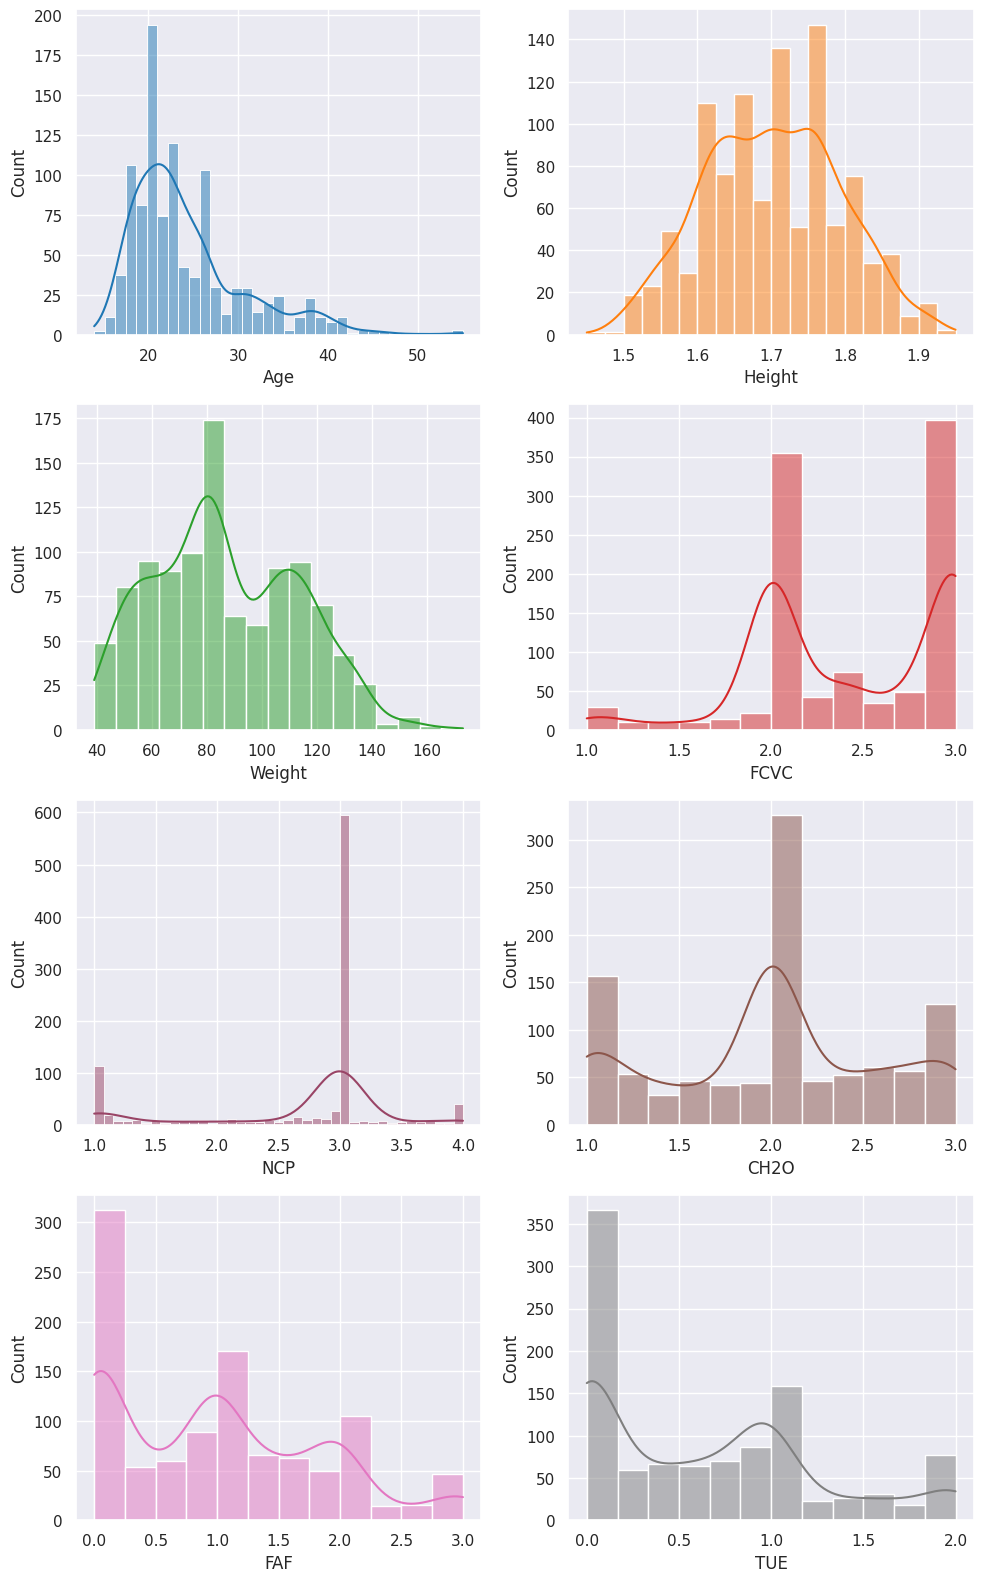

In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.set(style="darkgrid")
num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, 4 * num_rows))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


for i, col in enumerate(numerical_cols):
    row = i // 2
    col_idx = i % 2
    sns.histplot(data=df, x=col, kde=True, ax=axs[row, col_idx], color=colors[i % len(colors)])

plt.tight_layout()
plt.show()

1. **Age**
   Right-skewed. Most participants are in their early 20s, very few are above 40.

2. **Height**
   Roughly normal distribution. Most heights are around 1.7 meters.

3. **Weight**
   Slightly right-skewed. Weight is spread out, with many people between 60–110 kg, and a few outliers above 140 kg.

4. **FCVC (Vegetable Consumption)**
   Bimodal. Peaks at 2 and 3, showing that most people consume vegetables regularly.

5. **NCP (Meals per Day)**
   Sharp peak at 3. This suggests that most people eat more than they needed.

6. **CH2O (Water Intake)**
   Peak at 2. Most people drink a moderate amount of water.

7. **FAF (Physical Activity)**
   Left-skewed. Many participants have low or no physical activity.

8. **TUE (Technology Use)**
   Left-skewed. Many spend little time using technology, but some use it heavily.


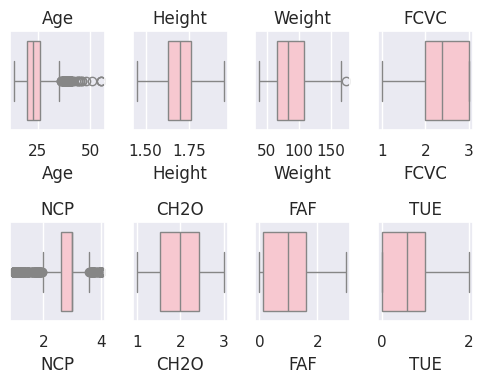

In [23]:
# for checking outlier

num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(5, 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=df, x=col, color='pink')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

The boxplots show the distribution and presence of outliers in each numerical feature. `Age` has a few mild outliers above 40, but most values are concentrated in the early 20s. `Height` and `Weight` are fairly normally distributed, though `Weight` shows more spread and a few high-value outliers. `FCVC`, `CH2O`, and `FAF` are all Likert-scale variables with neat, compact boxplots and no visible outliers, which is expected due to their fixed response ranges.
<br>
<br>
`NCP` (number of meals per day) has a very narrow box, showing that most people report the same value, they eat more than they needed, with a few variations. `TUE` (technology use) appears slightly more spread out but still without outliers. Overall, most features are well-behaved, with only minor outliers, mainly in `Age` and `Weight`.


In [24]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,24.276555,1.700995,86.755502,2.422785,2.665244,1.996067,0.990268,0.646117
std,6.339461,0.091455,26.174103,0.528836,0.793747,0.608318,0.853275,0.615897
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,66.500000,2.000000,2.600000,1.530000,0.110000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.586000
75%,26.000000,1.760000,108.040000,3.000000,3.000000,2.440000,1.610000,1.000000
max,55.000000,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


For **`FCVC`**, the count is now 1045 (same as other variables), confirming that missing values were successfully filled. The mean (2.42), median (2.39), and interquartile range remain similar to before, indicating that the imputation method (median) preserved the original distribution. There are no extreme values since `FCVC` is based on a Likert scale, and its standard deviation is still small, showing consistent responses across the dataset.

## ***Categorical Distribution***

/tmp/ipython-input-25-1421081816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])
/tmp/ipython-input-25-1421081816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])
/tmp/ipython-input-25-1421081816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])
/tmp/ipython-input-25-1421081816.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

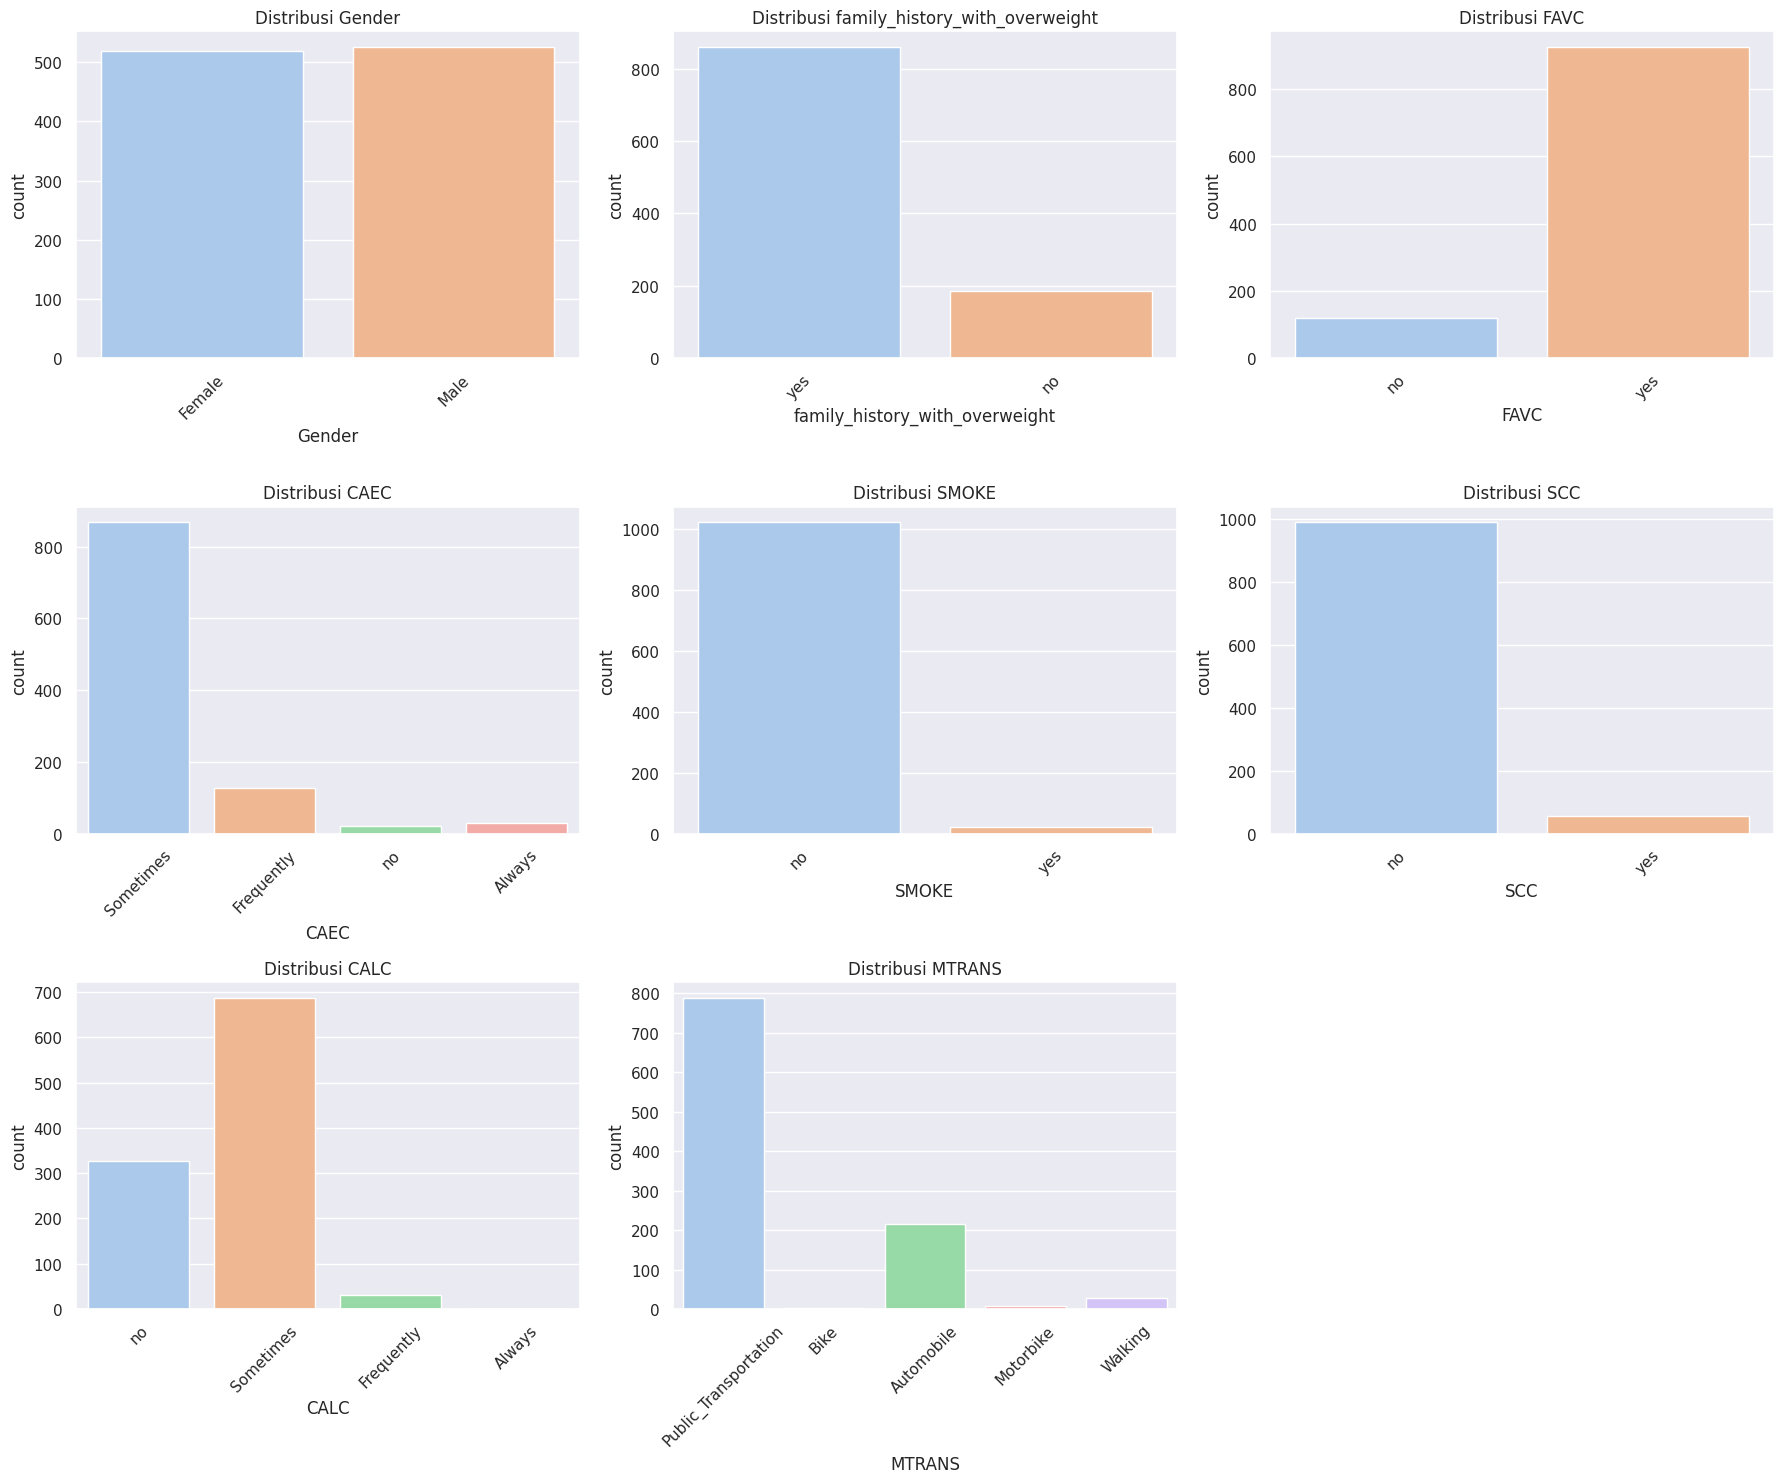

In [25]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'NObeyesdad']
num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # 3 per row

fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, palette='pastel', ax=axes[i])
    axes[i].set_title(f'Distribusi {col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **Gender** – Balanced distribution between male and female.
2. **Family History** – Majority have family history of overweight.
3. **FAVC (High Calorie Food)** – Most people answered "yes".
4. **CAEC (Eating Between Meals)** – Mostly "Sometimes", few answered "Always" or "Never".
5. **SMOKE** – Vast majority are non-smokers.
6. **SCC (Calorie Monitoring)** – Most do not monitor calorie intake.
7. **CALC (Alcohol Consumption)** – Mostly "Sometimes", few answered "Always" or "Frequently".
8. **MTRANS (Transport Mode)** – Majority use public transportation; car is second most common.


/tmp/ipython-input-26-2087276955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='pastel', order=target_order)


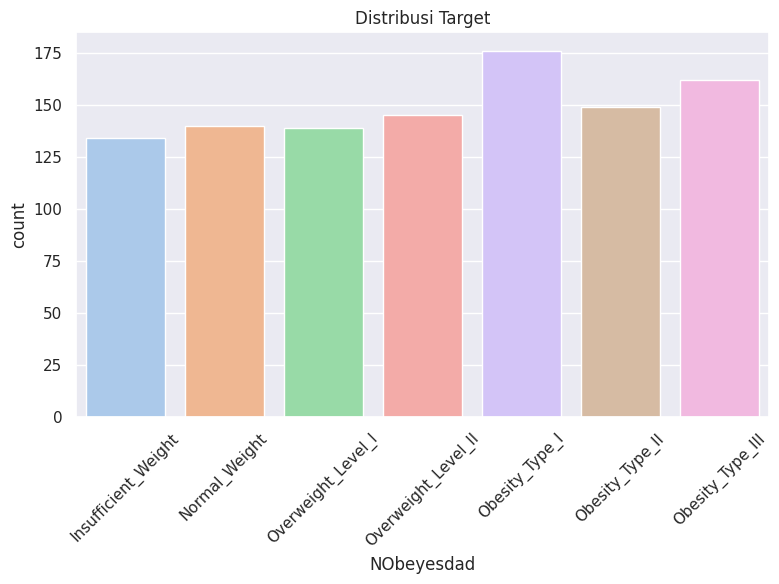

In [26]:
# target variable
target_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NObeyesdad', palette='pastel', order=target_order)
plt.title('Distribusi Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The target variable `NObeyesdad` is fairly balanced across all seven classes. The class with the highest count is **Obesity\_Type\_I**, followed by **Obesity\_Type\_III**. The lowest is **Insufficient\_Weight**, but the difference is not extreme. This balanced distribution is good for classification, as it reduces the risk of bias toward majority classes during model training.

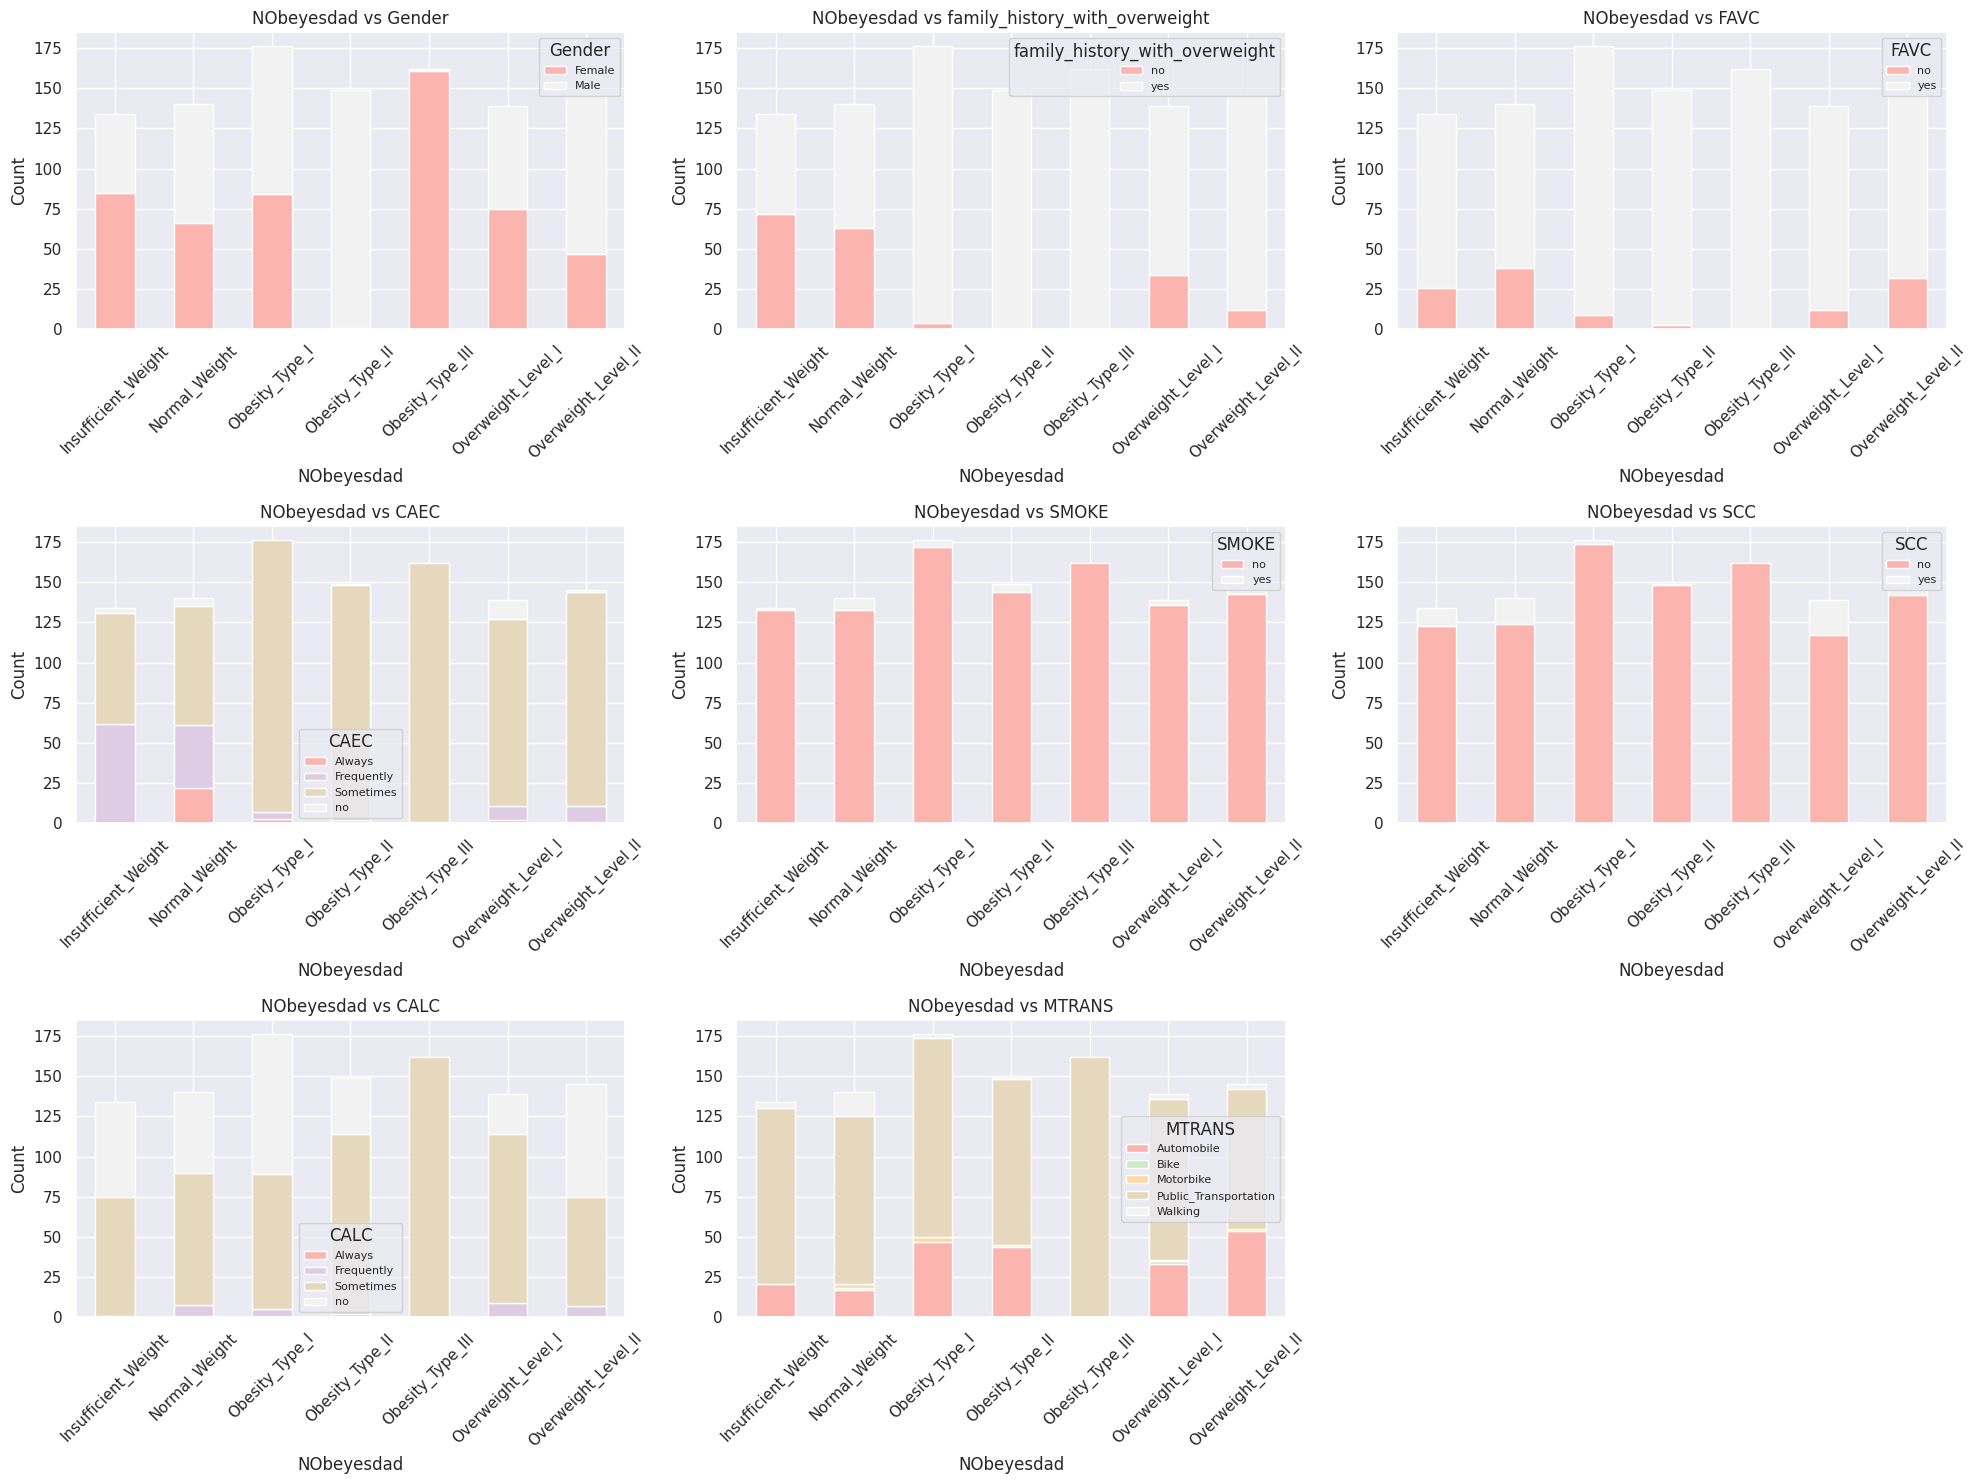

In [27]:
# categorical vs categorical
target_col = 'NObeyesdad'

num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # 3 per row

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[target_col], df[col])
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Pastel1')
    axes[i].set_title(f'{target_col} vs {col}')
    axes[i].set_xlabel(target_col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title=col, fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **Gender vs NObeyesdad**
   
   Obesity types are more common in males, especially Obesity Type I and III.

2. **Family History vs NObeyesdad**
   
   Those with family history of overweight appear more in obesity categories, suggesting a genetic or environmental influence.

3. **FAVC (High-Calorie Food) vs NObeyesdad**
   
   Most individuals with obesity tend to answer "yes", showing a strong link between frequent high-calorie food intake and obesity.

4. **CAEC (Eating Between Meals) vs NObeyesdad**
   
   “Sometimes” dominates across all classes, but those who eat more frequently between meals are more represented in the higher obesity categories.

5. **SMOKE vs NObeyesdad**
   
   Majority of people across all classes are non-smokers. No clear pattern with obesity level.

6. **SCC (Calorie Monitoring) vs NObeyesdad**
   
   Those who do not monitor calories appear more in all obesity categories.

7. **CALC (Alcohol) vs NObeyesdad**
   
   “Sometimes” drinkers dominate, with slightly more frequency in obese groups, but overall no strong visible pattern.

8. **MTRANS (Transportation) vs NObeyesdad**
   
   Most people use public transportation, and this mode is common across all classes. Not much variation is seen between transportation mode and obesity level.

In general, variables like **family history, FAVC, CAEC, and SCC** seem to show clearer associations with obesity levels.


/tmp/ipython-input-28-1637708354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='pastel', ax=axes[i])
/tmp/ipython-input-28-1637708354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='pastel', ax=axes[i])
/tmp/ipython-input-28-1637708354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target_col, y=col, palette='pastel', ax=axes[i])
/tmp/ipython-input-28-1637708354.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

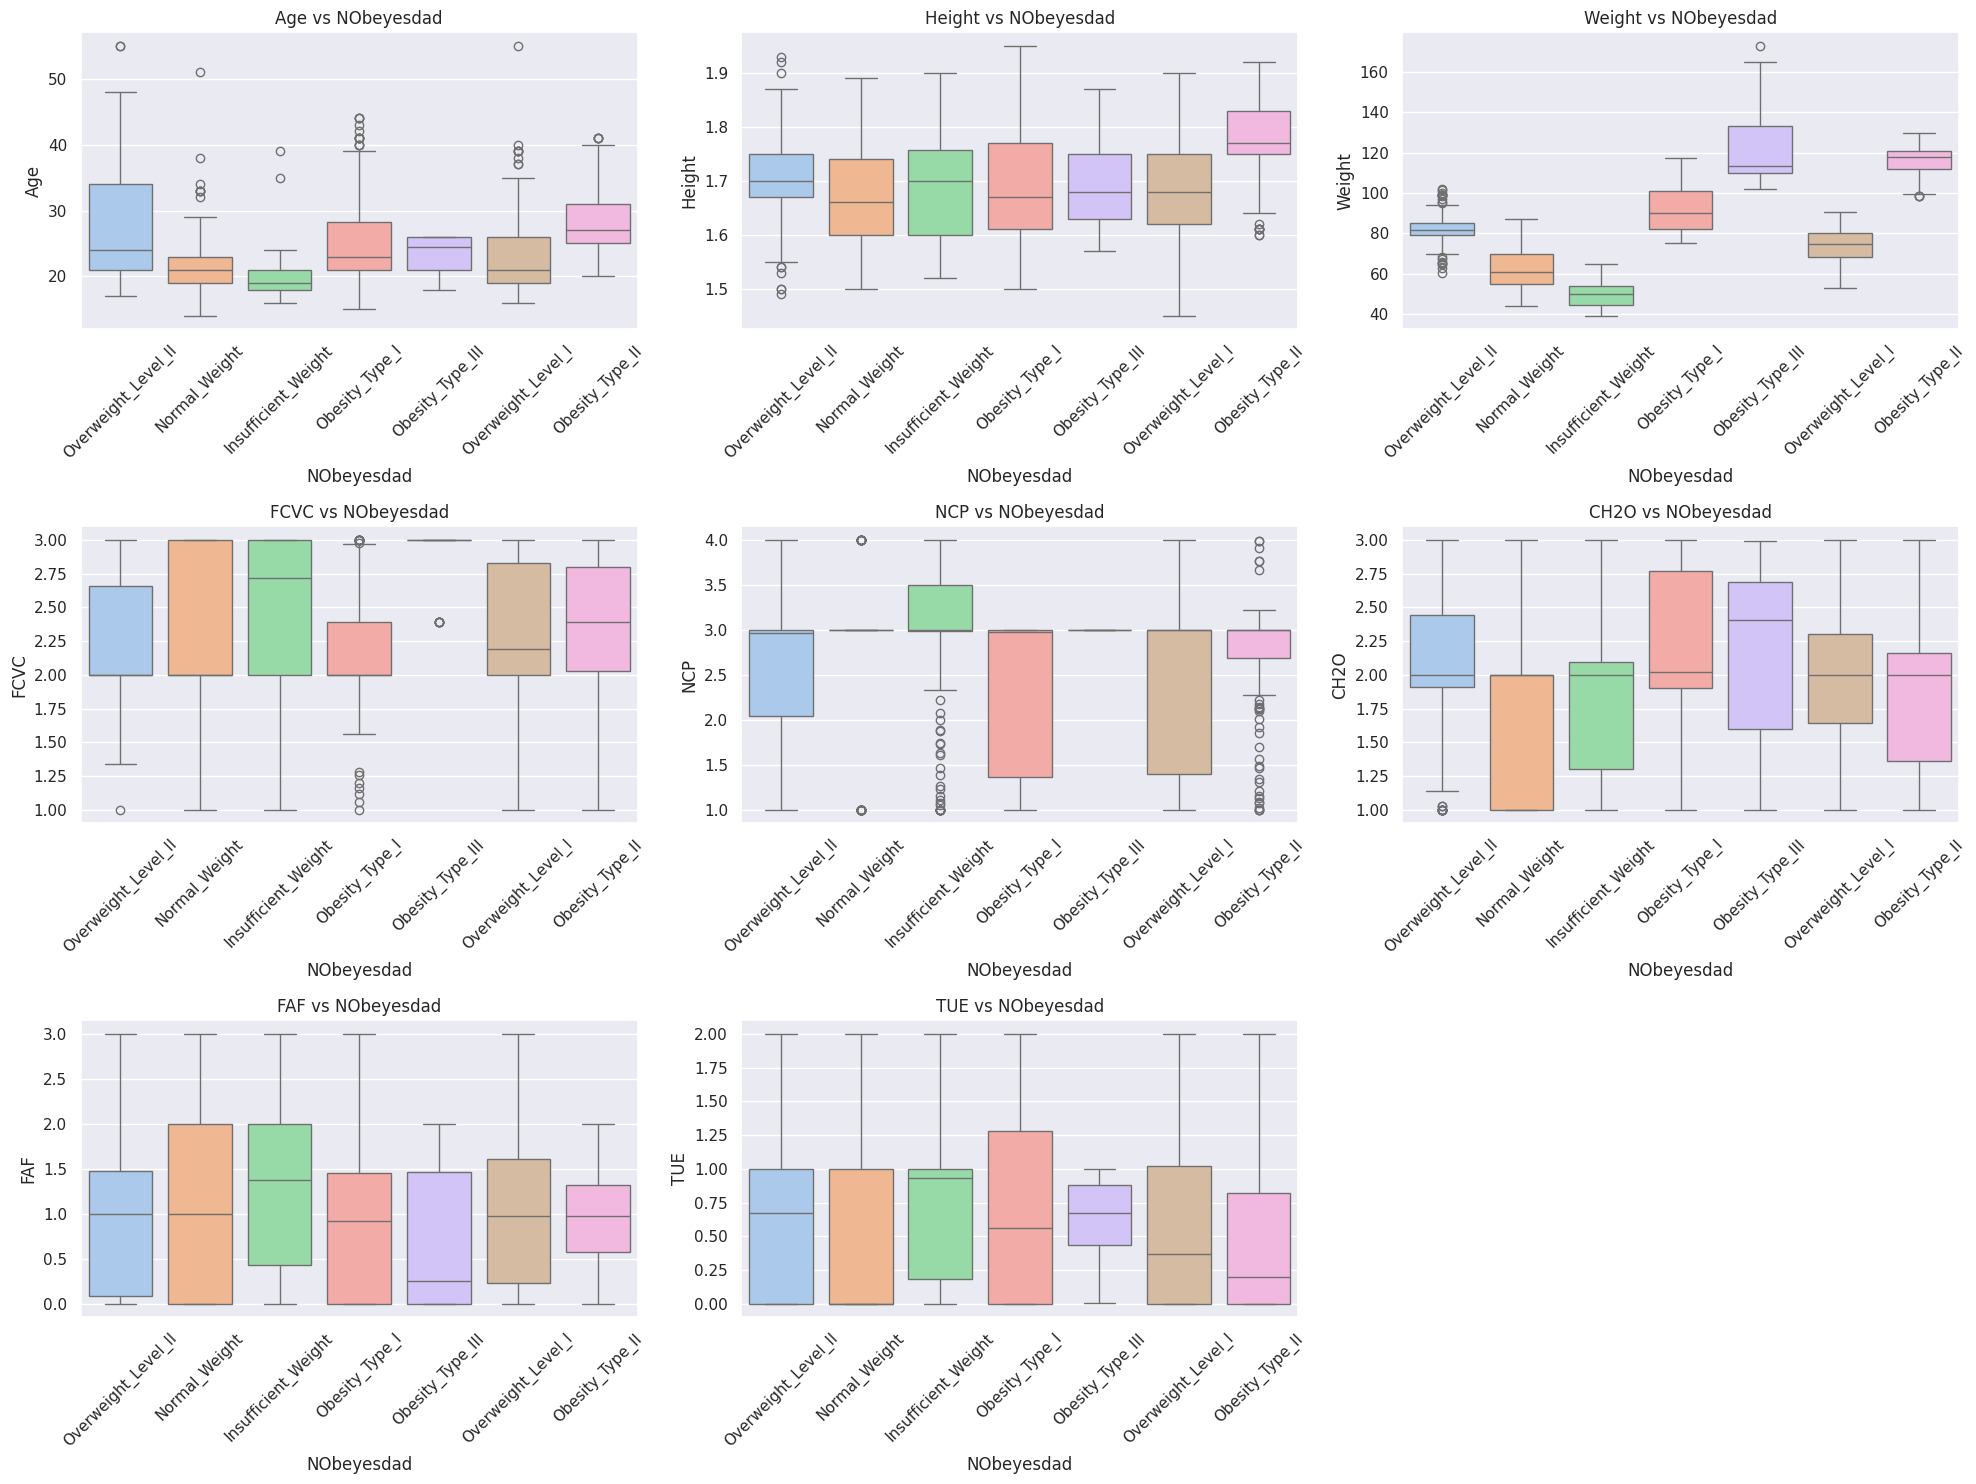

In [28]:
num_cols = len(numerical_cols)
num_rows = (num_cols + 2) // 3  # 3 plots per row

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=target_col, y=col, palette='pastel', ax=axes[i])
    axes[i].set_title(f'{col} vs {target_col}')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. **Age**
   
   Slightly older individuals tend to appear in higher obesity types, especially Obesity Type I and II.

2. **Height**
   
   Height does not vary much across classes; it’s fairly consistent.

3. **Weight**
   
   Weight increases clearly with obesity level, as expected. It’s a strong indicator of the target.

4. **FCVC (Vegetable Consumption)**
   
   Fairly high across all classes, with lower values slightly more common in Obesity Type I.

5. **NCP (Meals per Day)**
   
   People in obesity categories tend to eat slightly more meals per day.

6. **CH2O (Water Intake)**
   
   Higher in normal and insufficient weight classes; slightly lower in obese groups.

7. **FAF (Physical Activity)**
   
   Those in higher obesity classes tend to have lower physical activity levels.

8. **TUE (Technology Use)**
   
   Higher tech usage is more common in lower obesity levels; obese individuals show lower median TUE.

**Conclusion**: Variables like **Weight**, **FAF**, **TUE**, and **CH2O** show clearer separation between classes and may be useful predictors.

#**Mapping**

The mapping of numerical variables like `FCVC`, `NCP`, `CH2O`, `FAF`, and `TUE` into labeled categories (like "Kurang", "Cukup", "Sering") is important for **transforming raw continuous data into interpretable ordinal levels**. This step is crucial when the numerical scale actually represents ordered qualitative levels, such as frequency or intensity (like water intake or tech usage).
<br>
<br>
By mapping them into meaningful categories first, we preserve their **ordinal nature**, which allows for proper encoding (ordinal encoding) later in the machine learning pipeline. Without this step, the model might incorrectly interpret these values as continuous or give equal importance to differences that aren’t semantically meaningful. This preprocessing helps improve both interpretability and model performance.


In [29]:
# mapping FCVC (freq makan sayur)
def map_fcvc(x):
    if x < 2:
        return 'Jarang'
    elif x == 2:
        return 'Sedang'
    else:
        return 'Sering'

# mapping NCP (freq makan per day)-> normal 3x
def map_ncp(x):
    if x < 3:
        return 'Kurang'
    elif x == 3:
        return 'Cukup'
    else:
        return 'Berlebih'

# mapping CH2O (water consumtion)
def map_ch2o(x):
    if x <= 1.5:
        return 'Kurang'
    elif x <= 2.5:
        return 'Cukup'
    else:
        return 'Banyak'

# mapping FAF (physical activity)
def map_faf(x):
    if x == 0:
        return 'Tidak Aktif'
    elif x <= 1:
        return 'Kurang Aktif'
    elif x <= 2:
        return 'Cukup Aktif'
    else:
        return 'Sangat Aktif'

# mapping TUE (freq daily use tech)
def map_tue(x):
    if x == 0:
        return 'Tidak Pernah'
    elif x <= 1:
        return 'Jarang'
    elif x <= 2:
        return 'Sering'
    else:
        return 'Sangat Sering'

# mapping to column
df['FCVC'] = df['FCVC'].apply(map_fcvc)
df['NCP'] = df['NCP'].apply(map_ncp)
df['CH2O'] = df['CH2O'].apply(map_ch2o)
df['FAF'] = df['FAF'].apply(map_faf)
df['TUE'] = df['TUE'].apply(map_tue)

/tmp/ipython-input-30-1740394695.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=df, x=col, ax=ax, palette="pastel", order=order)
/tmp/ipython-input-30-1740394695.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=df, x=col, ax=ax, palette="pastel", order=order)
/tmp/ipython-input-30-1740394695.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.countplot(data=df, x=col, ax=ax, palette="pastel", order=order)
/tmp/ipython-input-30-1740394695.py:16: FutureWarning: 

Passing `palette` without assignin

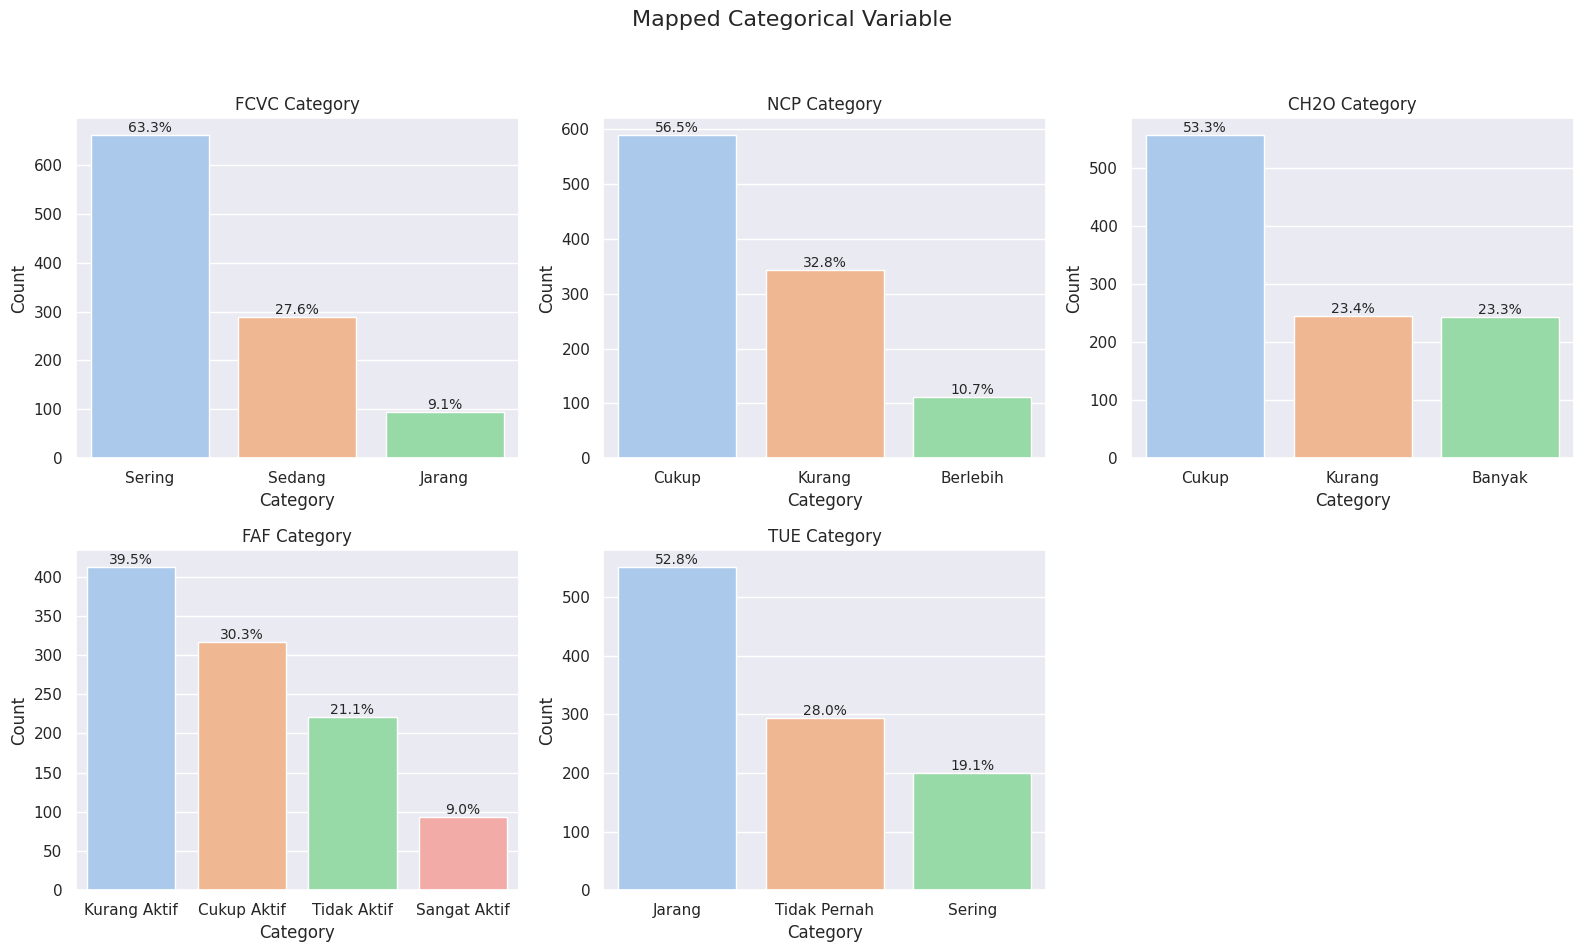

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Mapped Categorical Variable', fontsize=16)

mapped_cols = [
    ('FCVC', 'FCVC Category'),
    ('NCP', 'NCP Category'),
    ('CH2O', 'CH2O Category'),
    ('FAF', 'FAF Category'),
    ('TUE', 'TUE Category')
]

for ax, (col, title) in zip(axes.flatten(), mapped_cols):
    order = df[col].value_counts().index
    total = len(df[col])
    barplot = sns.countplot(data=df, x=col, ax=ax, palette="pastel", order=order)
    ax.set_title(title)
    ax.set_ylabel('Count')
    ax.set_xlabel('Category')

    for p in barplot.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        barplot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='bottom', fontsize=10)

if len(mapped_cols) < len(axes.flatten()):
    for j in range(len(mapped_cols), len(axes.flatten())):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* **FCVC Category (Frequency of Consumption of Vegetables):**
    * **Sering (Frequent) - 63.3%:** A large majority of individuals frequently consume vegetables, which is a positive habit for health.
    * **Sedang (Moderate) - 27.6%:** A significant portion consumes vegetables moderately.
    * **Jarang (Rare) - 9.1%:** A small percentage rarely consumes vegetables, indicating a potential area for intervention.

* **NCP Category (Number of Main Meals per Day):**
    * **Cukup (Enough/Adequate) - 56.5%:** Over half the individuals have an adequate number of main meals.
    * **Kurang (Less) - 32.8%:** About a third have fewer main meals than ideal, which might lead to snacking or overeating later.
    * **Berlebih (Excessive) - 10.7%:** A small group consumes an excessive number of main meals.

* **CH2O Category (Daily Water Intake):**
    * **Cukup (Enough/Adequate) - 53.3%:** More than half the individuals have adequate daily water intake.
    * **Kurang (Less) - 23.4%:** Nearly a quarter have less than adequate water intake.
    * **Banyak (High) - 23.3%:** Another significant portion reports high water intake.

* **FAF Category (Frequency of Physical Activity):**
    * **Kurang Aktif (Less Active) - 39.5%:** The largest group is less active, highlighting a major area for health promotion.
    * **Cukup Aktif (Moderately Active) - 30.3%:** A good number are moderately active.
    * **Tidak Aktif (Inactive) - 21.1%:** A substantial portion is inactive, indicating high risk.
    * **Sangat Aktif (Very Active) - 9.0%:** Only a small percentage is very active.

* **TUE Category (Time Spent Using Technology):**
    * **Jarang (Rare) - 52.8%:** Over half the individuals spend rare amounts of time using technology, which is generally positive.
    * **Tidak Pernah (Never) - 28.0%:** A significant portion never spends time using technology (this might be interpreted as very low usage, or perhaps an "unknown" category if mapping was strict).
    * **Sering (Frequent) - 19.1%:** Nearly 20% frequently use technology, potentially leading to a sedentary lifestyle.

In [31]:
for col, _ in mapped_cols:
    df[col] = df[col].astype('category')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# **Preprocessing Using Pipelines**

In [32]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,Sering,Kurang,Sometimes,no,Cukup,no,Cukup Aktif,Sering,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,Sering,Cukup,Sometimes,no,Cukup,no,Sangat Aktif,Tidak Pernah,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,Sering,Berlebih,Frequently,no,Cukup,no,Kurang Aktif,Jarang,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,Sedang,Cukup,Sometimes,no,Cukup,no,Kurang Aktif,Jarang,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,Sering,Kurang,Sometimes,no,Banyak,no,Kurang Aktif,Sering,Sometimes,Public_Transportation,Obesity_Type_I


In [33]:
target_column = 'NObeyesdad'

# ordinal encoding
ordinal_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
ordinal_categories = [
    ['Jarang', 'Sedang', 'Sering'],                                     # FCVC
    ['Kurang', 'Cukup', 'Berlebih'],                                    # NCP
    ['Kurang', 'Cukup', 'Banyak'],                                      # CH2O
    ['Tidak Aktif', 'Kurang Aktif', 'Cukup Aktif', 'Sangat Aktif'],     # FAF
    ['Tidak Pernah', 'Jarang', 'Sering'],                               # TUE
]

# one-hot encoding
nominal_features = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# scaling
numeric_features = ['Age', 'Height', 'Weight']

In [34]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ordinal_pipe = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(categories=ordinal_categories))
])

nominal_pipe = Pipeline([
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

numeric_pipe = Pipeline([
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('ordinal', ordinal_pipe, ordinal_features),
    ('nominal', nominal_pipe, nominal_features),
    ('numeric', numeric_pipe, numeric_features)
])

In [35]:
target_order = [
    'Insufficient_Weight',
    'Normal_Weight',
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

ordinal_enc = OrdinalEncoder(categories=[target_order])
df[target_column] = ordinal_enc.fit_transform(df[[target_column]]).astype(int)

In [36]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [37]:
y.head()

,NObeyesdad
0,3
1,1
2,0
3,1
4,4


# **Splitting Data**

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# **Model**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# RANDOM FOREST
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# fine tuning using GridSearchCV
rf_params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy', 'log_loss']
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(categories=[['Jarang',
                                                                                                                      'Sedang',
                                                                                                                      'Sering'],
                                                                                                                     ['Kurang',
                                                                                                                      'Cukup',
                                                                                                                      'Berlebih'],
                                                                                                                     ['Kurang',
                                                                                                                      'Cukup',
                                                                                                                      'Banyak'],
                                                                                                                     ['Tidak '
                                                                                                                      'Aktif',
                                                                                                                      'Kurang '
                                                                                                                      'Aktif',
                                                                                                                      'Cukup '
                                                                                                                      'Aktif',
                                                                                                                      'Sangat '
                                                                                                                      'Aktif'],
                                                                                                                     ['Tidak '
                                                                                                                      'Pernah',
                                                                                                                      'Jarang',
                                                                                                                      'Sering...
                                                                        ('numeric',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Height',
                                                                          'Weight'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 30

In [41]:
from xgboost import XGBClassifier

# XGBOOST
xgb_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# fine tuning using GridSearchCV
xgb_params = {
   'classifier__max_depth': [3, 6, 10],
   'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
   'classifier__n_estimators': [50, 100, 200],
   'classifier__subsample': [0.6, 0.8, 1.0],
   'classifier__gamma': [0, 0.1, 0.2]
}

xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:47:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ordinal',
                                                                         Pipeline(steps=[('ordinal_encoder',
                                                                                          OrdinalEncoder(categories=[['Jarang',
                                                                                                                      'Sedang',
                                                                                                                      'Sering'],
                                                                                                                     ['Kurang',
                                                                                                                      'Cukup',
                                                                                                                      'Berlebih'],
                                                                                                                     ['Kurang',
                                                                                                                      'Cukup',
                                                                                                                      'Banyak'],
                                                                                                                     ['Tidak '
                                                                                                                      'Aktif',
                                                                                                                      'Kurang '
                                                                                                                      'Aktif',
                                                                                                                      'Cukup '
                                                                                                                      'Aktif',
                                                                                                                      'Sangat '
                                                                                                                      'Aktif'],
                                                                                                                     ['Tidak '
                                                                                                                      'Pernah',
                                                                                                                      'Jarang',
                                                                                                                      'Sering...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__gamma': [0, 0.1, 0.2],
                         'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'classifier__max_depth': [3, 6, 10],
                         'classifier__n_estimators': [50, 100, 200],
                         'classifier__subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')


~~~~~~~~ Random Forest ~~~~~~~~
Accuracy: 0.9522
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.96      0.95        27
      Normal_Weight       0.92      0.86      0.89        28
 Overweight_Level_I       0.93      0.93      0.93        28
Overweight_Level_II       0.90      0.97      0.93        29
     Obesity_Type_I       0.97      0.94      0.96        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        32

           accuracy                           0.95       209
          macro avg       0.95      0.95      0.95       209
       weighted avg       0.95      0.95      0.95       209



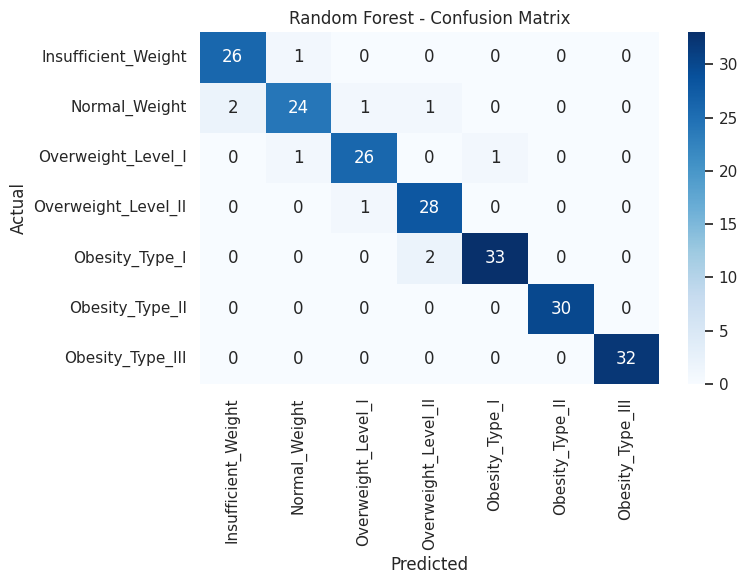

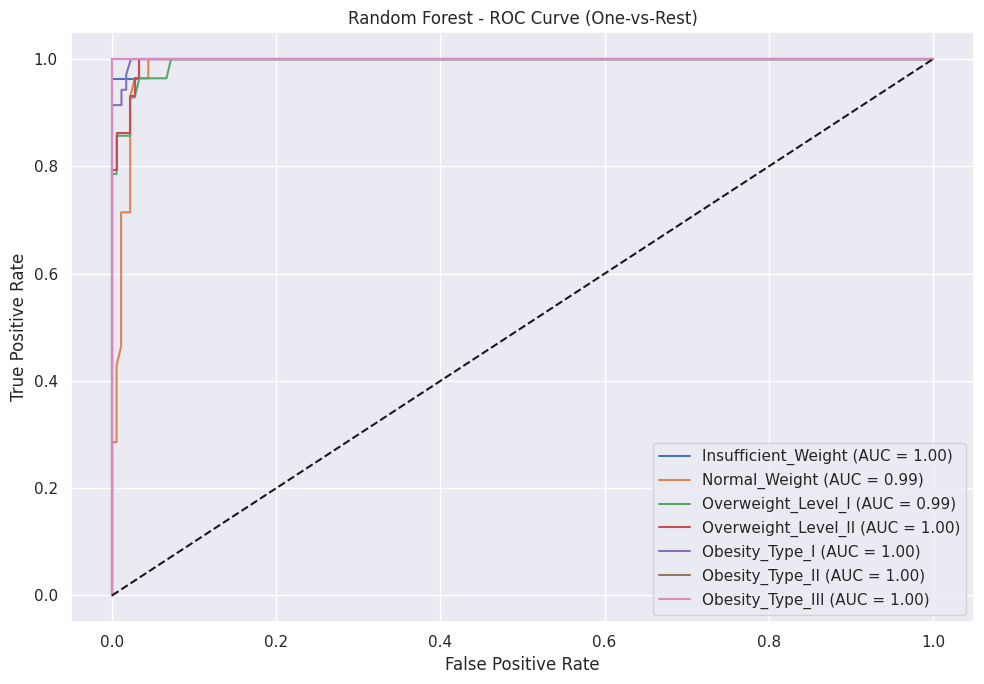


~~~~~~~~ XGBoost ~~~~~~~~
Accuracy: 0.9617
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Normal_Weight       0.93      0.96      0.95        28
 Overweight_Level_I       0.96      0.86      0.91        28
Overweight_Level_II       0.91      1.00      0.95        29
     Obesity_Type_I       0.97      0.97      0.97        35
    Obesity_Type_II       0.97      0.97      0.97        30
   Obesity_Type_III       1.00      1.00      1.00        32

           accuracy                           0.96       209
          macro avg       0.96      0.96      0.96       209
       weighted avg       0.96      0.96      0.96       209



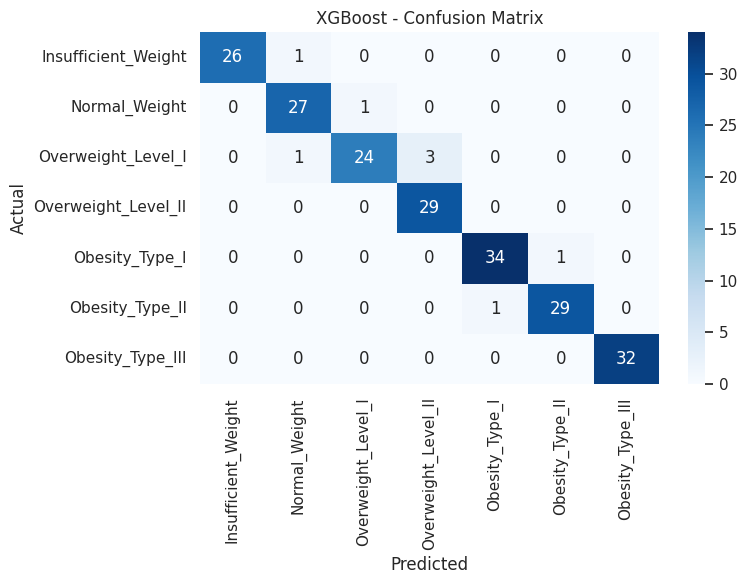

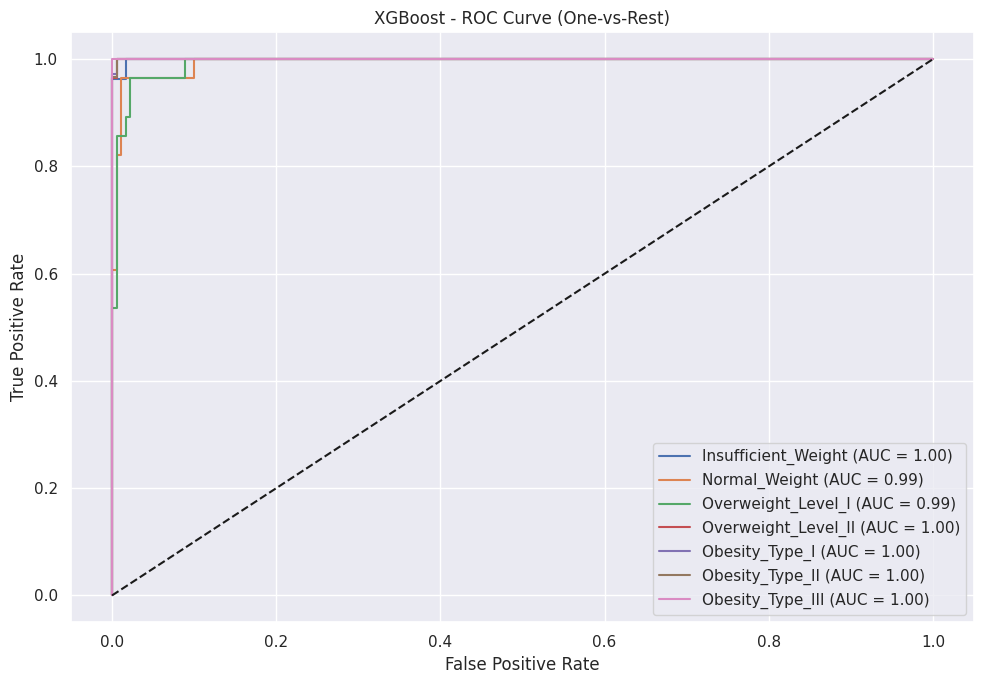

In [46]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# binarize labels for ROC
classes = list(range(len(target_order)))
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

models = {'Random Forest': rf_grid, 'XGBoost': xgb_grid}
best_score = 0
best_model = None
best_name = ""

for name, grid in models.items():
    print(f"\n~~~~~~~~ {name} ~~~~~~~~")
    y_pred = grid.predict(X_test)
    y_proba = grid.predict_proba(X_test)

    # accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=target_order))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_order,
                yticklabels=target_order)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve for multiclass
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    for i in range(n_classes):
        label = target_order[i]
        plt.plot(fpr[i], tpr[i], label=f'{label} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve (One-vs-Rest)')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

    if acc > best_score:
        best_score = acc
        best_model = grid.best_estimator_
        best_name = name

## ***Random Forest Model Interpretation***

The Random Forest model demonstrates **excellent overall performance** in classifying obesity levels, achieving an **accuracy of 95.22%**. This indicates that it correctly predicts the obesity category for a very high proportion of individuals in the test set.

1. **Precision, Recall, and F1-Score:**
    * The model performs exceptionally well across most obesity categories, with F1-scores predominantly in the 0.93 to 1.00 range.
    * `**Obesity_Type_II**` and `**Obesity_Type_III**` show perfect precision, recall, and F1-scores (1.00), meaning the model correctly identified all instances of these severe obesity types without any false positives or false negatives. This is crucial for the clinic's goal of identifying high-risk individuals.
    * `**Normal_Weight**` has slightly lower recall (0.86) and precision (0.92) compared to other categories, suggesting it occasionally misclassifies normal-weight individuals.
    * `**Overweight_Level_II**` shows high recall (0.97) but slightly lower precision (0.90), indicating it's good at catching most individuals in this category, but sometimes incorrectly labels others as Overweight_Level_II.

2. **Confusion Matrix:**
    * The diagonal values (ex: 26 for Insufficient_Weight, 24 for `Normal_Weight`, 33 for `Obesity_Type_I`, 30 for `Obesity_Type_II`, 32 for `Obesity_Type_III`) represent the number of **correct predictions** for each class. These numbers are high, reinforcing the strong recall.
    * The off-diagonal values show **misclassifications**.
        * One `**Insufficient_Weight**` individual was misclassified as `**Normal_Weight**`.
        * One `**Normal_Weight**` individual was predicted as `**Insufficient_Weight**`, and another as `**Overweight_Level_I**`, and one as `**Overweight_Level_II**`.
        * One `**Overweight_Level_I**` was predicted as `**Normal_Weight**`, and one as `**Obesity_Type_I**`.
        * One `**Overweight_Level_II**` was misclassified as `**Overweight_Level_I**`.
        * Two `**Obesity_Type_I**` individuals were misclassified as `**Overweight_Level_II**`.
    * Crucially, the severe obesity types (`**Obesity_Type_II**` and `**Obesity_Type_III**`) show zero misclassifications, which is excellent for identifying your target high-risk group.

3. **ROC Curve (One-vs-Rest) and AUC:**
    * The ROC curves for all classes are very close to the top-left corner, indicating a strong ability of the model to distinguish between each specific obesity level and all other levels.
    * The **AUC (Area Under the Curve) scores are exceptionally high (0.99 or 1.00) for all classes.** An AUC of 1.00 is perfect, meaning the model can perfectly distinguish between that class and all other classes. An AUC of 0.99 is also near perfect. This is a very strong indicator of the model's discriminative power across all obesity categories.

**In summary, the Random Forest model works very well for the clinic's needs.** It can correctly identify different obesity levels, especially severe cases. Most mistakes are small and happen between nearby weight categories, which is not a big issue. Overall, this model is a good tool to help the clinic find people at high risk of serious obesity early on.

## ***XGBoost Model Interpretation***

The XGBoost model performs **exceptionally well**, even slightly surpassing the Random Forest model with an overall **accuracy of 96.17%**. This indicates a very high reliability in classifying obesity levels.


1. **Precision, Recall, and F1-Score:**
    * Similar to Random Forest, XGBoost shows strong performance across almost all categories, with F1-scores generally ranging from 0.91 to 1.00.
    * `**Obesity_Type_III**` maintains perfect precision, recall, and F1-score (1.00), meaning it perfectly identifies this most severe obesity type.
    * `**Insufficient_Weight**`, `**Obesity_Type_I**`, and `**Obesity_Type_II**` also show very high (near-perfect) F1-scores (0.97-0.98), indicating excellent classification for these groups.
    * `**Normal_Weight**` has very strong recall (0.96) and precision (0.93), showing it is very good at identifying normal-weight individuals.
    * `**Overweight_Level_I**` has the lowest recall (0.86) among the categories, suggesting it sometimes misses individuals who are truly in this category (false negatives).
    * `**Overweight_Level_II**` has perfect recall (1.00), meaning it correctly identifies every individual in this category, though its precision is slightly lower (0.91), indicating some false positives for this group.

2. **Confusion Matrix:**
    * The diagonal values are very high, representing the large number of **correct predictions** for each class (e.g., 26 for `Insufficient_Weight`, 27 for Normal_Weight, 29 for `Overweight_Level_II`, 34 for `Obesity_Type_I`, 29 for `Obesity_Type_II`, 32 for `Obesity_Type_III`).
    * Examining misclassifications (off-diagonal values):
        * One `**Insufficient_Weight**` individual was predicted as `**Normal_Weight**`.
        * One `**Normal_Weight**` individual was predicted as `**Overweight_Level_I**`.
        * One `**Overweight_Level_I**` was predicted as `**Normal_Weight**`, and **three** were predicted as `**Overweight_Level_II**`. This explains the slightly lower recall for `Overweight_Level_I`.
        * One `**Obesity_Type_II**` individual was misclassified as `**Obesity_Type_I**`.
    * Similar to Random Forest, `**Obesity_Type_III**` has no misclassifications. The crucial insight for the clinic is that misclassifications between severe obesity types (like `Obesity Type II` predicted as `Obesity Type I`) are still within concerning categories, meaning individuals at high risk are still being flagged for intervention.

3. **ROC Curve (One-vs-Rest) and AUC:**
    * The ROC curves are tightly clustered near the top-left corner, signifying the model's strong discriminatory power for all classes.
    * The **AUC scores are consistently high (0.99 or 1.00) for all classes**, indicating that the XGBoost model is excellent at distinguishing each obesity level from the rest. The perfect 1.00 AUC for several classes (`Insufficient_Weight`, `Overweight_Level_II`, `Obesity_Type_I`, `Obesity_Type_II`, `Obesity_Type_III`) is particularly impressive.

**In summary, the XGBoost model performs very well and is slightly better than the Random Forest model.** It has high accuracy and does a great job in detecting severe obesity cases like Obesity Type II and III. Although it sometimes confuses `Overweight Level I` with `Level II`, this is a minor issue. Overall, the model is strong and reliable for helping the clinic find people at high risk of obesity early.


# **Best Model**

When comparing the two models, both Random Forest and XGBoost perform very well, with over 95% accuracy and strong F1-scores. Random Forest is great at detecting severe obesity types, but XGBoost does slightly better overall. It has a higher accuracy (96.17%) and gives more consistent results across all obesity levels, including perfect detection for some of the most serious cases.

Because of its slightly better accuracy and strong performance in more categories, XGBoost is the better choice for the clinic. It can help the clinic find people at risk more accurately and support more focused and effective health actions.


In [47]:
import joblib

joblib.dump(best_model, "best_model.pkl")

print(f"\nBest model: {best_name} with {best_score:.4f} accuracy")


Best model: XGBoost with 0.9617 accuracy
